## MD5 Collision

In [2]:
import hashlib

def calculate_md5_hash(input_string):
    byte_data = bytes.fromhex(input_string)
    md5_hash = hashlib.md5()
    md5_hash.update(byte_data)
    md5_result = md5_hash.hexdigest()

    return md5_result



In [3]:
string1 = '4dc968ff0ee35c209572d4777b721587d36fa7b21bdc56b74a3dc0783e7b9518afbfa200a8284bf36e8e4b55b35f427593d849676da0d1555d8360fb5f07fea2'
calculate_md5_hash(string1)

'008ee33a9d58b51cfeb425b0959121c9'

In [4]:
string2 = '4dc968ff0ee35c209572d4777b721587d36fa7b21bdc56b74a3dc0783e7b9518afbfa202a8284bf36e8e4b55b35f427593d849676da0d1d55d8360fb5f07fea2'
calculate_md5_hash(string2)

'008ee33a9d58b51cfeb425b0959121c9'

### MD5 with images

In [19]:
# Let's see md5 collision on images
from PIL import Image
from IPython.display import display  

def display_image(image_path):
    image = Image.open(image_path)
    display(image)

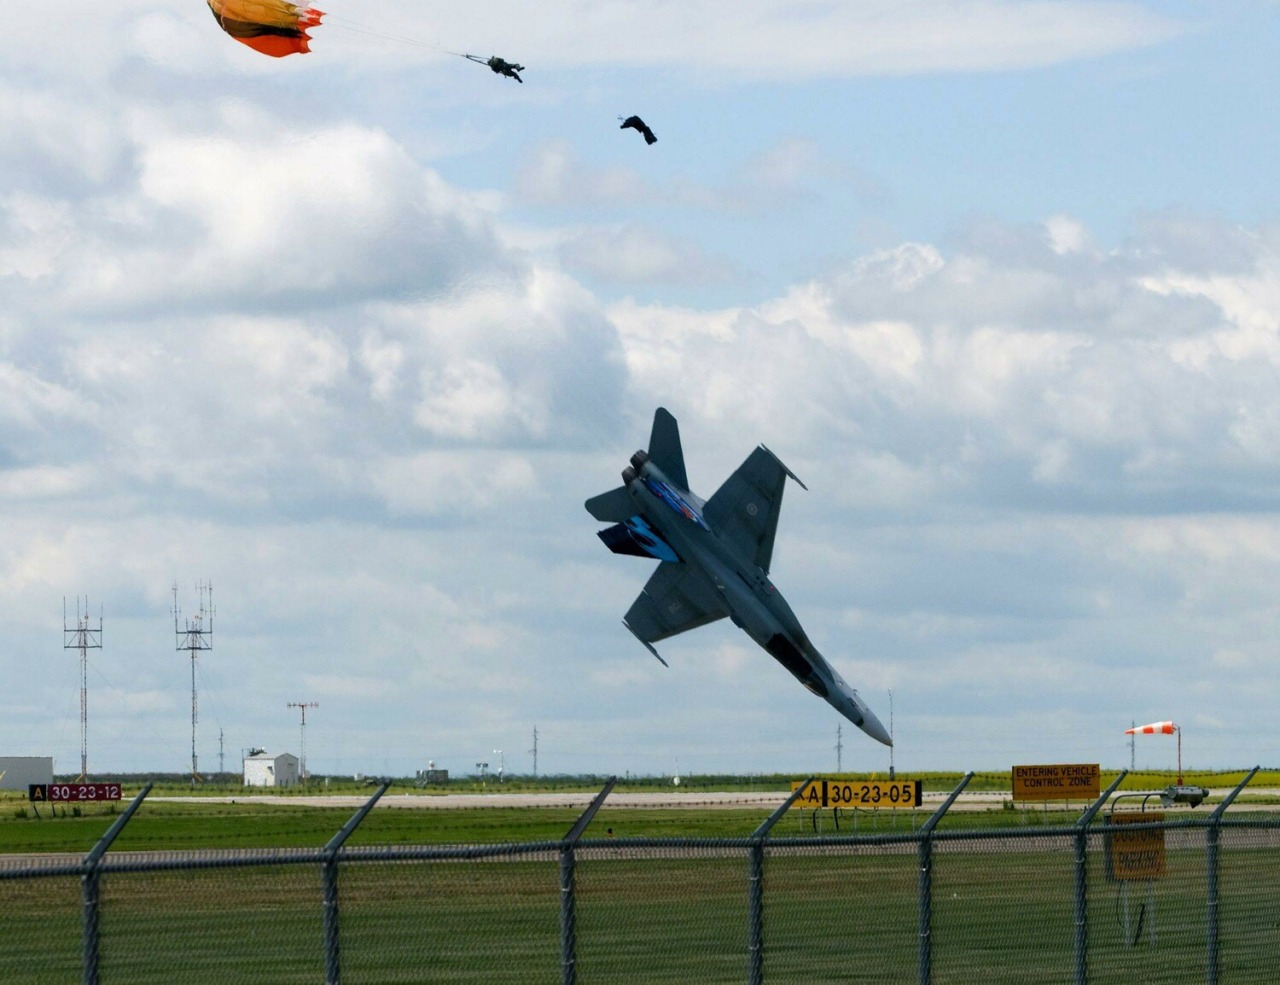

In [20]:
plane = 'plane.jpg'
display_image(plane)

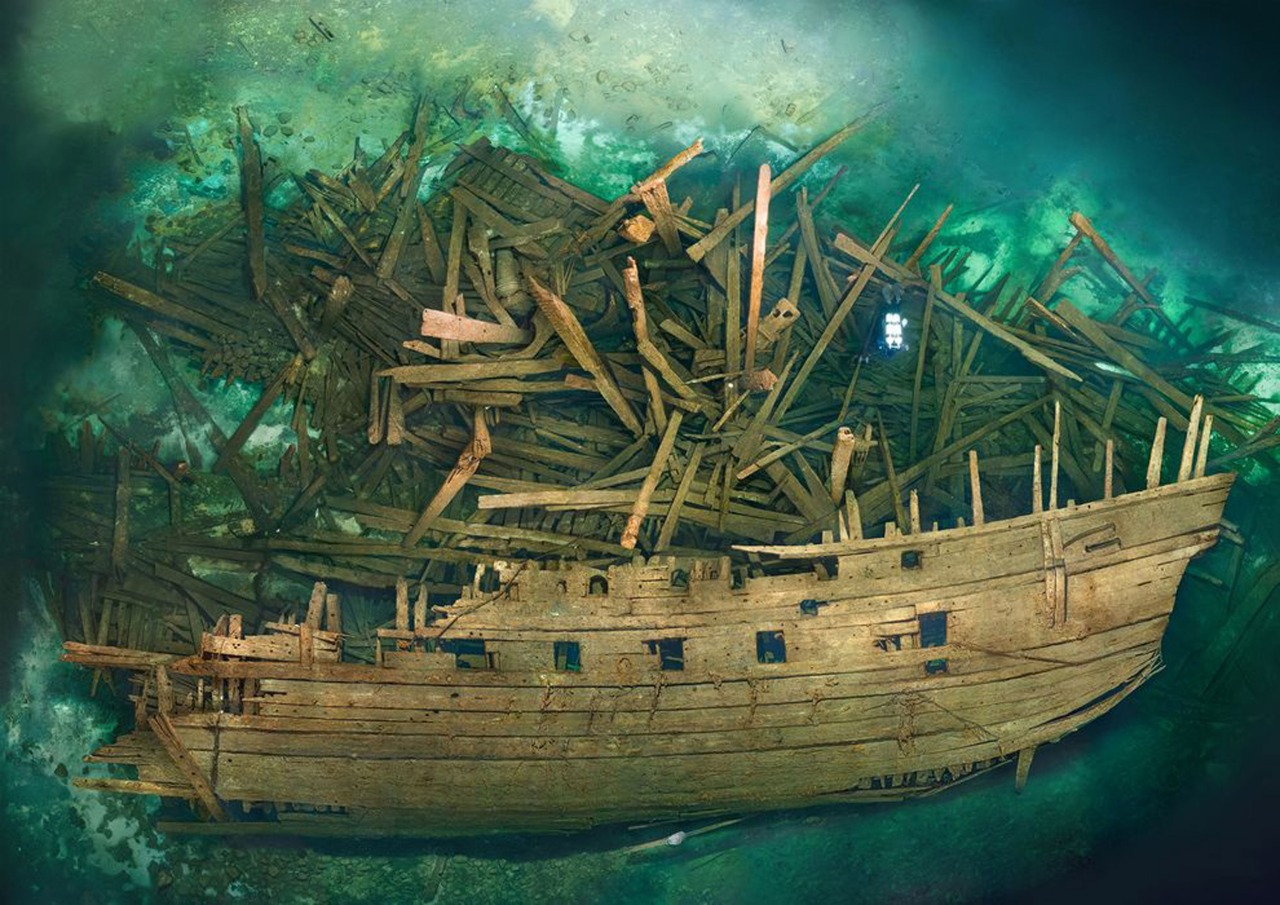

In [21]:
ship = 'ship.jpg'
display_image(ship)

In [24]:
# Now let's calculate hash of these images:
def calculate_image_hash(image_path):
    with open(image_path, 'rb') as f:
        image_data = f.read()
    md5_hash = hashlib.md5()
    md5_hash.update(image_data)
    md5_result = md5_hash.hexdigest()
    print(md5_result)

In [25]:
calculate_image_hash(plane)

253dd04e87492e4fc3471de5e776bc3d


In [26]:
calculate_image_hash(ship)

253dd04e87492e4fc3471de5e776bc3d


## Bcrypt in python

In [28]:
import bcrypt

def get_hash(data, work_factor):
    hashed_string = bcrypt.hashpw(data.encode('utf-8'), bcrypt.gensalt(rounds=work_factor))
    return hashed_string

In [32]:
# check results with varying work factor
original_string = "HelloWorld123"

for work_factor in range(10, 21):
    hashed_string = get_hash(original_string, work_factor)

    print(f"Work Factor: {work_factor}")
    print(f"Original String: {original_string}")
    print(f"Hashed String: {hashed_string}\n")

Work Factor: 10
Original String: HelloWorld123
Hashed String: b'$2b$10$yMJDtgqRtzVWZ0Du0mLr0.UEkdiSNX4Etqf0dT9A6ZiTEURu.qrbi'

Work Factor: 11
Original String: HelloWorld123
Hashed String: b'$2b$11$NVpwMYHm0oLVYzpPC0gGFOrE3XyrpQC0ceCyvE4.A054iJel4a7i.'

Work Factor: 12
Original String: HelloWorld123
Hashed String: b'$2b$12$cUOJpohsCckrQNmMxYUEHuSTAi8X2EaZOVYtD1NcUKBIKFv9/1xjW'

Work Factor: 13
Original String: HelloWorld123
Hashed String: b'$2b$13$1P9QnPtfTv5hK7K/YDARFeSoHRsmJA6mgzilMJUa.Y5vruvsS17CK'

Work Factor: 14
Original String: HelloWorld123
Hashed String: b'$2b$14$hG8Vp8/.4vwrINrCug9If.WpqQtuL5j8eP85OjPgKhwyaR/4hBQ9q'

Work Factor: 15
Original String: HelloWorld123
Hashed String: b'$2b$15$dx08YM1YIBp/Pl1PhsYz6eWUed.NAaJdzk1Yekcz61MyGsQUMpe3e'

Work Factor: 16
Original String: HelloWorld123
Hashed String: b'$2b$16$UTW3d1HSH/NXo48h4C34u.5WTYHzlvuXn1OzqClIX2f5cWtY8NpXa'

Work Factor: 17
Original String: HelloWorld123
Hashed String: b'$2b$17$jsavKZoIgliugGHf9xpIFOaVH84lbVyBYIY.naeK

## Password based key derivation function 2 (PBKDF2)

In [4]:
import hashlib
import os
from base64 import b64encode, b64decode

def pbkdf2(password, salt, iterations=100000, key_length=4, hash_algorithm='sha256'):
    derived_key = hashlib.pbkdf2_hmac(hash_algorithm, password, salt, iterations, key_length)
    encoded_key = b64encode(derived_key).decode('utf-8')

    if (encoded_key == 'm32dbA=='):
        print(f'password is: {password}')
        
    


    return encoded_key


In [2]:
password = b"securePassword"
salt = os.urandom(16) 
stored_password = pbkdf2(password, salt)
print(stored_password)


kTpzG1UZJ87AvQ1RggyvbJLBzDX3By8FtWIRgApe7/k=


### Challenge!!
A password is a three digit number between 000 and 999. The hash value, using the salt of 0012 is:
 -  m32dbA==
 <br>
 <br>
 
 
 Find the password?

In [5]:
for i in range(1000):
    pbkdf2(str(i).encode('utf-8'),b'0012')

password is: b'659'
